In [2]:
import seaborn as sns 
import pandas as pd 
import matplotlib.pyplot as plt
from sklearn import datasets, linear_model
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_classification
from sklearn.metrics import confusion_matrix

df = pd.read_csv('WA_Fn-UseC_-HR-Employee-Attrition.csv')
df = df.dropna()
df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


In [5]:
dummies = pd.get_dummies(df['Gender'])
dummies.head()

,Female,Male
0,1,0
1,0,1
2,0,1
3,1,0
4,0,1


In [6]:
df = pd.concat([df, dummies], axis=1) #the axis=1 means: add it to the columns (axis=0 is rows)
df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,Female,Male
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,0,8,0,1,6,4,0,5,1,0
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,1,10,3,3,10,7,1,7,0,1
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,0,7,3,3,0,0,0,0,0,1
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,0,8,3,3,8,7,3,0,1,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,1,6,3,3,2,2,2,2,0,1


In [10]:
df_subset = df[['Age', 'DistanceFromHome', 'Education', 'YearsAtCompany', 'YearsSinceLastPromotion', 'DailyRate', 'Male', 'Attrition']]
df_subset.head(10)

,Age,DistanceFromHome,Education,YearsAtCompany,YearsSinceLastPromotion,DailyRate,Male,Attrition
0,41,1,2,6,0,1102,0,Yes
1,49,8,1,10,1,279,1,No
2,37,2,2,0,0,1373,1,Yes
3,33,3,4,8,3,1392,0,No
4,27,2,1,2,2,591,1,No
5,32,2,2,7,3,1005,1,No
6,59,3,3,1,0,1324,0,No
7,30,24,1,1,0,1358,1,No
8,38,23,3,9,1,216,1,No
9,36,27,3,7,7,1299,1,No


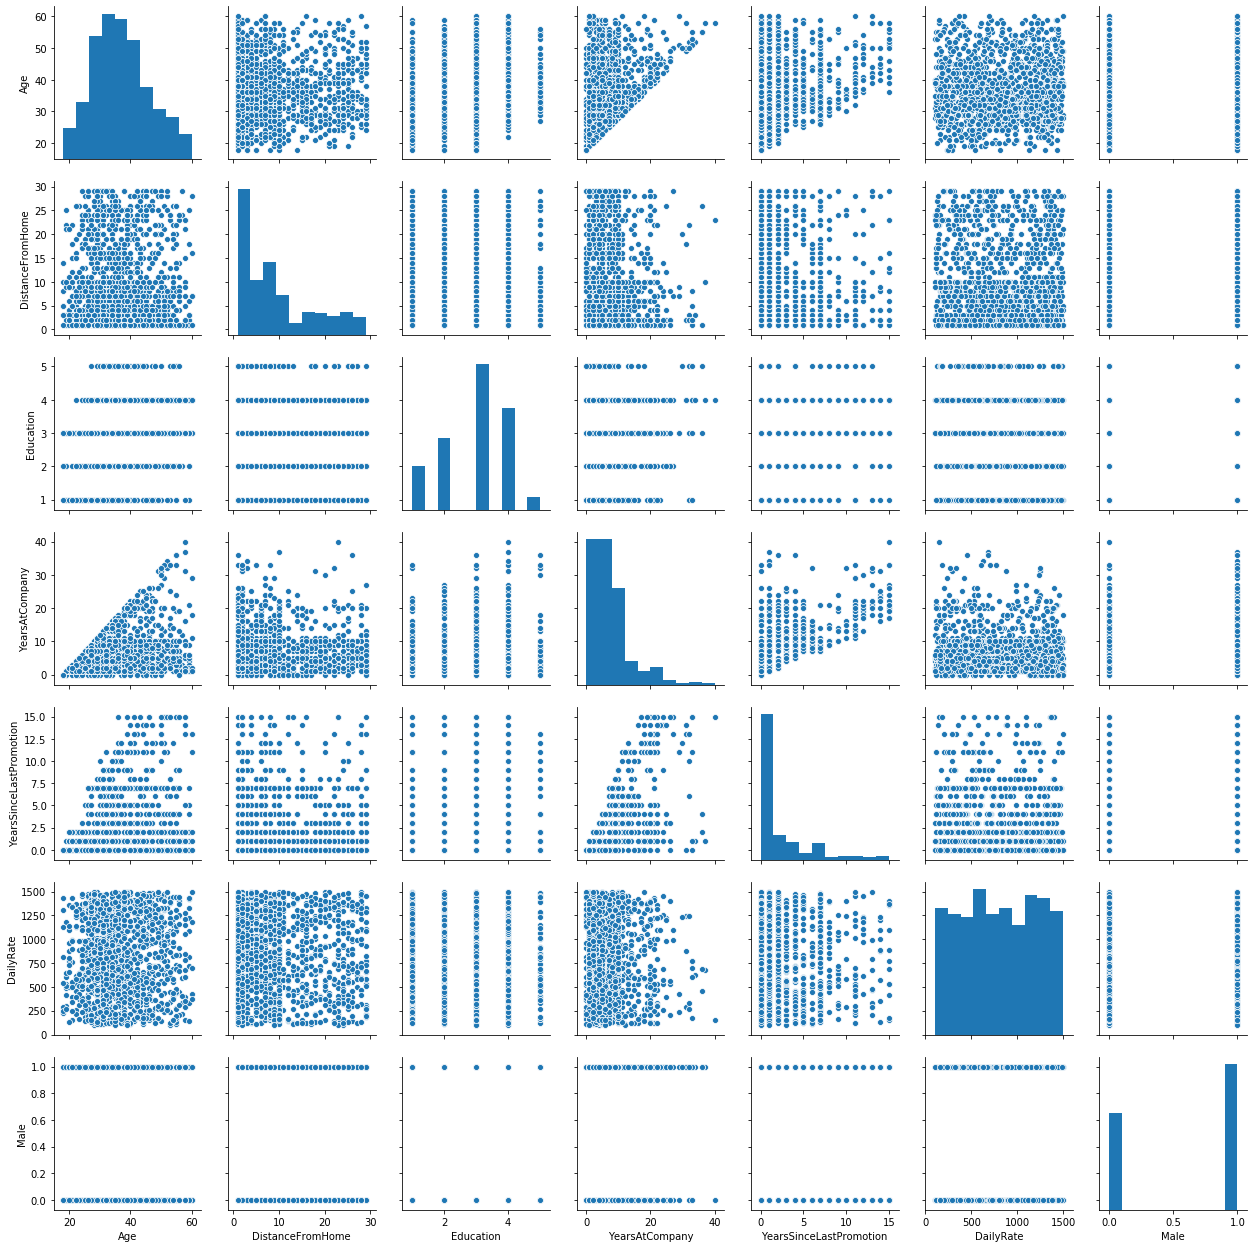

In [11]:
sns.pairplot(df_subset)
plt.show()

In [12]:
y = df_subset['Attrition'] # defining the target variable (dependent variable) as y
X = df_subset[['Age', 'DistanceFromHome', 'Education', 'YearsAtCompany', 'YearsSinceLastPromotion', 'DailyRate', 'Male']]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1) #test_size=0.3 indicates the percentage of the data that should be held over for testing

In [13]:
model = RandomForestClassifier(max_depth=5, random_state=1)
model = model.fit(X, y)
y_test_pred = model.predict(X_test) #the predicted values
cm = confusion_matrix(y_test, y_test_pred) #creates a "confusion matrix" on the test set
cm

//anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


array([[362,   2],
       [ 67,  10]])

In [18]:
df['Attrition'].value_counts() #did this to check if the first row is 'No Attrition'

No     1233
Yes     237
Name: Attrition, dtype: int64

In [20]:
conf_matrix = pd.DataFrame(cm, index=['NoAttrition', 'YesAttrition'], columns = ['NoAttrition_p', 'YesAttrition_p']) 
conf_matrix

,NoAttrition_p,YesAttrition_p
NoAttrition,362,2
YesAttrition,67,10


The way to read this is that of the dataset, 362 are correctly predicted as not attritioned and 2 are incorrectly predicted. 67 are correcly predicted as yes predicted, and 10 are predicted incorrectly. This means that the algorithm thought 10 times that the answer was 'NoAttrition' while it was 'YesAttrition'.  

A reason for this is because in the dataset, there are way more values for 'No Attrition' (1233) than 'Yes Attrition' (237). The algorithm therefore thinks faster that there would not be attrition than that there would be attrition.  

The algorithm of random forrest is reduced from the algorithm decision tree. The decision tree algorithm makes different branches and stops whenever you have 'pure leaves'. At each node of the tree it calculates the $x$ variable and cuts of the point that produces the optimal split for the $y$ variable. The random forrest is making multiple trees and improves accuracy further than the decision tree. 

In [14]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_test_pred))

              precision    recall  f1-score   support

          No       0.84      0.99      0.91       364
         Yes       0.83      0.13      0.22        77

    accuracy                           0.84       441
   macro avg       0.84      0.56      0.57       441
weighted avg       0.84      0.84      0.79       441



No Attrition:

$precision = .84$

$recall = 0.99$

Yes Attrition:

$precision = 0.83$

$recall = 0.13$

The precision stands for how precise I can say something is attrition. With both cases this is quite high so that is good. 

The recall stands for how many of the variable 'attrition' I can recall. For no attrition this is very high but on the 'yes' attrition, this is really low. 